In [1]:
"""
importing the necessary libraries, do not modify
"""
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')


from IPython.display import display,Image, Latex

from IPython.display import clear_output

import SchemDraw as schem
import SchemDraw.elements as e

import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc

import sympy as sym

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 18,
        }

from scipy.constants.constants import C2K
from scipy.constants.constants import K2C
from scipy.constants.constants import F2K
from scipy.constants.constants import K2F
from scipy.constants.constants import C2F
from scipy.constants.constants import F2C

<h1> Thermodynamics Module</h1>

The thermodynamic properties necessary for the treatment of heat transfer problem include:
<ul>
<li> Density $\rho \text{ (kg/m$^3$)}$</li>
<li> Specific heat at constant pressure $C_p \text{ (J/(kg.K)}$</li>
<li> Dynamic viscosity $\mu \text{ (kg/(m.s))}$</li>
<li> Thermal conductivity $k \text{ (W/(m.K))}$</li>
<li> Kinematic viscosity $\nu \text{ (m$^2$/s)}$</li>
<li> Thermal diffusivity $\alpha \text{ (m$^2$/s)}$</li>
<li> Prandtl number $Pr$, ratio of kinematic viscosity to thermal diffusivity, dimensionless
<li> Thermal expansion coefficient $\beta \text{ (1/K)}$</li>
</ul> 
The module <FONT FACE="courier" style="color:blue">from Libraries import thermodynamics as thermo </FONT> gives these thermodynamics properties for water, air, argon and krypton under $1\text{ atm}$ over a given range of temperature $T$ (dependent upon the fluid). Air properties are tabled between $-150\text{$^\circ$C}$ and $400\text{$^\circ$C}$, water between $274\text{K}$ and $373\text{K}$, Argon between $100\text{K}$ and $700\text{K}$ and Krypton between $150\text{K}$ and $750\text{K}$
<p class='alert alert-danger'>
<b>Input must be in Kelvin</b>
</p>
Use the scipy functions <FONT FACE="courier" style="color:blue">C2K </FONT> and <FONT FACE="courier" style="color:blue">F2K </FONT> to convert temperatures to Kelvin. Thermodynamic properties are linearly interpolated from the two nearest temperature states.

<h2> How does it work?</h2>

First load up the module

In [2]:
from Libraries import thermodynamics as thermo

Second define a variable as your fluid. For example:

In [3]:
water_pipe = thermo.Fluid('water')

The class is called Fluid, the capital letter F is necessary. If you don't remember which fluids are available, execute the following:

In [4]:
? thermo.Fluid

Once your variable is initialized as a Fluid, you can get the properties you need. For example, we want the thermodynamic properties of water at $70^\circ F$.

In [5]:
water_pipe.get_properties(F2K(70.))

Now you can print any of the quantities defined above:

In [6]:
print('Density %4.3f kg/m^3' %water_pipe.rho)
print('Specific heat %4.3f J/Kg.K' %water_pipe.Cp)
print('Dynamic viscosity %1.3e kg/m.s' %water_pipe.mu)
print('Thermal conductivity %4.4f W/m.K' %water_pipe.k)
print('Kinematic viscosity %1.3e m^2/s' %water_pipe.nu)
print('Thermal diffusivity %1.3e m^2/s' %water_pipe.alpha)
print('Prandtl number %4.3f ' %water_pipe.Pr)
print('Thermal expansion coefficient %1.3e 1/K' %water_pipe.beta)

Density 997.973 kg/m^3
Specific heat 4183.343 J/Kg.K
Dynamic viscosity 9.750e-04 kg/m.s
Thermal conductivity 0.6004 W/m.K
Kinematic viscosity 9.770e-07 m^2/s
Thermal diffusivity 1.438e-07 m^2/s
Prandtl number 6.793 
Thermal expansion coefficient 2.181e-04 1/K


<h1>Thermal Resistance Module</h1>

The class thermal resistance is imported with <FONT FACE="courier" style="color:blue">from Libraries import HT_thermal_resistance as res</FONT>.

Thermal resistances are derived from an analogy between heat transfer and electric circuit. Each mode of heat transfer can be represented by a thermal resistance, linking the heat flux ($q''\text{ W/m$^2$}$), heat rate per unit length ($q'\text{ W/m}$) or heat rate ($q\text{ W}$) to the temperature difference between two points ($T_a-T_b$, with $T_a>T_b$:
<p class='alert alert-danger'>
$$
q''=\frac{1}{R''_\text{th}}\left(T_a-T_b\right),\; q'=\frac{1}{R'_\text{th}}\left(T_a-T_b\right),\; q=\frac{1}{R_\text{th}}\left(T_a-T_b\right)
$$
</p>
The heat transfer rate, also called heat loss or heat gain, is analog to the current, and the temperature to the potential difference. 

The first step is to define an array of thermal resistance, and give each resistance its own label. <b style="color:red"> Remember not use commas, use periods instead</b>.

Here we use the class Resistance in the module HT_thermal_resistance. The first call requires the label (in Latex format with \$ $\) and the dimensional unit of the associated flux


In [7]:
from Libraries import HT_thermal_resistance as res

Rth = []
Rth.append(res.Resistance('$R_{conv.in}$','W'))
Rth.append(res.Resistance('$R_{cond.pipe}$','W'))
Rth.append(res.Resistance('$R_{conv.out}$','W'))
Rth.append(res.Resistance('$R_{rad.out}$','W'))

print('number of resistances %2i' %len(Rth))

number of resistances  4


Typically the next step is to draw the thermal circuit using the module SchemDraw already available from the first cell:
<FONT FACE="courier" style="color:blue">
import SchemDraw as schem
</FONT>
and
<FONT FACE="courier" style="color:blue">
import SchemDraw.elements as e
</FONT>

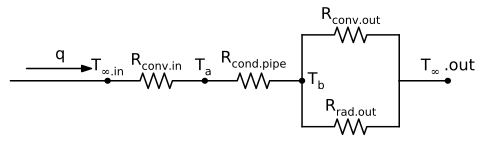

In [8]:
d = schem.Drawing()
L1=d.add( e.LINE, d = 'right')
d.labelI(L1,'q')
d.add( e.DOT, label='$T_{\infty.in}$')
R0 = d.add( e.RES, d='right', label=Rth[0].name )
d.add( e.DOT, label='$T_a$')
R1 = d.add( e.RES, d='right', label=Rth[1].name )
d.add( e.DOT, rgtlabel='$T_b$')
L0 = d.add( e.LINE, d = 'up', l = 1.5)
R2 = d.add( e.RES, d='right', label=Rth[2].name )
L1 = d.add( e.LINE, d = 'down', l = 1.5)
L2 = d.add( e.LINE, d = 'right', l = 1.5)
d.add(e.DOT, label = '$T_\infty.out$')
L3 = d.add( e.LINE, d = 'down', xy = R1.end, l = 1.5)
R3 = d.add( e.RES, d = 'right', label = Rth[3].name)
L4 = d.add( e.LINE, d = 'up', l = 1.5)
d.draw()

For 1D conduction in a solid or a fluid at rest, the expression of the thermal resistance depends upon the geometry of the system:
<FONT FACE="courier" style="color:blue">.conduction(geo,k,r_a,r_b,A,r_a_name,r_b_name,A_name,Ta_name,Tb_name)</FONT>
<ul>
<li> Plane wall of thermal conductivity $k$, thickness $L$ and cross-sectional surface area $A$ <FONT FACE="courier" style="color:blue"> geo = 'plane', r_a = L, r_b = 0</FONT>
<p class='alert alert-danger'>
$$
R_\text{th,cond}=\frac{L}{kA}
$$
</p>
</li>
<li> Cylindrical wall of thermal conductivity $k$, between inner radius $r_a$ and outer radius $r_b$ and axial length $L$ <FONT FACE="courier" style="color:blue"> geo = 'cylindrical', A = L</FONT>

<p class='alert alert-danger'>
$$
R_\text{th,cond}=\cfrac{\ln\left(\cfrac{r_b}{r_a}\right)}{2\pi kL}
$$
</p>
</li>
<li> Spherical wall of thermal conductivity $k$, between inner radius $r_a$ and outer radius $r_b$

<FONT FACE="courier" style="color:blue"> geo = 'spherical', A = 1</FONT>
<p class='alert alert-danger'>
$$
R_\text{th,cond}=\cfrac{\cfrac{1}{r_a}-\cfrac{1}{r_b}}{4\pi k}
$$
</p>
</li>
</ul>
For convection heat transfer across a surface of area $A$ with a convection heat transfer coefficient $h$, the class attribute is <FONT FACE="courier" style="color:blue">convection(h,A,h_name,A_name,Ta_name,Tb_name)</FONT>

<p class='alert alert-danger'>
$$
R_\text{th,conv}=\frac{1}{hA}
$$
</p>

For radiation heat transfer across a surface of area $A$ with a radiation heat transfer coefficient $h_r$, the class attribute is <FONT FACE="courier" style="color:blue">radiation(eps,T_s,T_sur,A,Ta_name,Tb_name)</FONT>
<p class='alert alert-danger'>
$$
R_\text{th,rad}=\frac{1}{h_rA}\, \text{ with } h_r = \varepsilon\sigma(T_s+T_\text{sur})(T_s^2+T_\text{sur}^2)
$$
<b> To calculate $h_r$, temperatures must be in Kelvin</b>
</p>

Like a thermal circuit, $n$ thermal resistances in serial are equivalent to one total resistance. If the $n$ resistances are stored in an array $R[i]$, the total resistance of resistances in series starting at $m$ and finishing at $n$ is 
<FONT FACE="courier" style="color:blue">serial_sum(R,m,n)</FONT>
<p class='alert alert-danger'>
$$
R_\text{th,tot}=\sum_{i=m}^{n}R[i]
$$
</p>
Similarly, thermal resistances in parallel between $n$ and $m$ reduce to
<FONT FACE="courier" style="color:blue">parallel_sum(R,m,n)</FONT>
<p class='alert alert-danger'>
$$
R_\text{th,tot}=\left(\sum_{i=m}^{n}\cfrac{1}{R[i]}\right)^{-1}
$$
</p>

All arguments above with <FONT FACE="courier" style="color:blue">_name </FONT> extension help with the diplay of equations, which is automatically generated by the class attribute <FONT FACE="courier" style="color:blue"> display_equation(i)</FONT> where i is the index of the resistance you are interested in. The following shows an example of the definition of thermal resistance and the display of equations:

(0.15707963267948966, 0.17278759594743862)


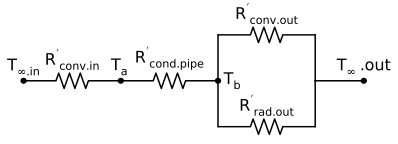

In [21]:
"""Example: heated water at T_infty_in flowing in a pipe with convection heat transfer h_i. The pipe of length L is made of copper, length L,
inner radius r_a, outer radius r_b. The pipe is immersed in air at T_infty_out and the heat transfer from the outer
surface of the pipe to the air is through convection and radiation. Find the heat loss per unit length
"""  
L = 1. #m
r_a = 0.05/2.  #m
r_b = 0.055/2. #m
h_i = 60. #W/m^2.K
k_pipe = 80. #W/m.K
h_o = 2. #W/m^2.K
eps = 0.8
T_infty_in = 320. #C
T_infty_out = 5. #C
T_sur = T_infty_out #radiation reference temperature
A_i = 2.*np.pi*r_a*L
A_o = 2.*np.pi*r_b*L
print(A_i,A_o)
T_b = 305. # a mere guess at this point

Rth = []
Rth.append(res.Resistance("$R'_{conv.in}$","W/m"))
Rth.append(res.Resistance("$R'_{cond.pipe}$","W/m"))
Rth.append(res.Resistance("$R'_{conv.out}$","W/m"))
Rth.append(res.Resistance("$R'_{rad.out}$","W/m"))

d = schem.Drawing()
#L1=d.add( e.LINE, d = 'right')
#d.labelI(L1,'q')
d.add( e.DOT, label='$T_{\infty.in}$')
R0 = d.add( e.RES, d='right', label=Rth[0].name )
d.add( e.DOT, label='$T_a$')
R1 = d.add( e.RES, d='right', label=Rth[1].name )
d.add( e.DOT, rgtlabel='$T_b$')
L0 = d.add( e.LINE, d = 'up', l = 1.5)
R2 = d.add( e.RES, d='right', label=Rth[2].name )
L1 = d.add( e.LINE, d = 'down', l = 1.5)
L2 = d.add( e.LINE, d = 'right', l = 1.5)
d.add(e.DOT, label = '$T_\infty.out$')
L3 = d.add( e.LINE, d = 'down', xy = R1.end, l = 1.5)
R3 = d.add( e.RES, d = 'right', label = Rth[3].name)
L4 = d.add( e.LINE, d = 'up', l = 1.5)
d.draw()

Rth[0].convection(h_i,A_i,'h_{in}','2{\pi}{r_a}L','T_{\infty.in}','T_a')
Rth[1].conduction('cylindrical',k_pipe,r_a,r_b,L,'k_{pipe}','r_a','r_b','L','T_a','T_b')
Rth[2].convection(h_o,A_o,'h_{out}','2{\pi}{r_b}L','T_b','T_{\infty.out}')
Rth[3].radiation(eps,C2K(T_b),C2K(T_sur),A_o,'h_r','2{\pi}{r_b}L','T_b','T_{\infty.out}')

In [22]:
#Verification of equations:
for i in range(len(Rth)):
    print("Thermal element # %2i" %i)
    Rth[i].display_equation(i)

Thermal element #  0


      -Tₐ + T_{\infty.in}
q'₀ = ───────────────────
          R'_{conv.in}   

q'₀ = 2{\pi}{r_a}L⋅h_{in}⋅(-Tₐ + T_{\infty.in})

Thermal element #  1


         Tₐ - T_b   
q'₁ = ──────────────
      R'_{cond.pipe}

      2⋅π⋅L⋅k_{pipe}⋅(Tₐ - T_b)
q'₁ = ─────────────────────────
                  ⎛r_b⎞        
               log⎜───⎟        
                  ⎝ rₐ⎠        

Thermal element #  2


      T_b - T_{\infty.out}
q'₂ = ────────────────────
         R'_{conv.out}    

q'₂ = 2{\pi}{r_b}L⋅h_{out}⋅(T_b - T_{\infty.out})

Thermal element #  3


      T_b - T_{\infty.out}
q'₃ = ────────────────────
          R'_{rad.out}    

q'₃ = 2{\pi}{r_b}L⋅hᵣ⋅(T_b - T_{\infty.out})

The total resistance of the system reduces to:

In [23]:
R_tot = res.serial_sum(Rth,0,1) + res.parallel_sum(Rth,2,3)
for i in range(len(Rth)):
    print(Rth[i].R)
print(R_tot)

0.106103295395
0.000189613578035
2.89372623803
0.361958099028
0.428009494424


In [24]:
q = R_tot*(T_infty_in - T_infty_out)
print(q)

134.822990744


In [25]:
T = np.zeros(4)
T[0] = T_infty_in

T[1] = T[0] - q*Rth[0].R
T[2] = T[1] - q*Rth[1].R
T[3] = T_infty_out
print(T)

[ 320.          305.69483639  305.66927212    5.        ]


In [20]:
print(Rth[3].h)

16.3741143589
